### Airline analysis(predict to Delay)

In [1]:
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/yoo/Data-dev/etc/practice_analysis/Airlines.csv')
print(df.shape)

df.head(10)

(539383, 9)


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
5,6,CO,1094,LAX,IAH,3,30,181,1
6,7,DL,1768,LAX,MSP,3,30,220,0
7,8,DL,2722,PHX,DTW,3,30,228,0
8,9,DL,2606,SFO,MSP,3,35,216,1
9,10,AA,2538,LAS,ORD,3,40,200,1


18


<AxesSubplot:>

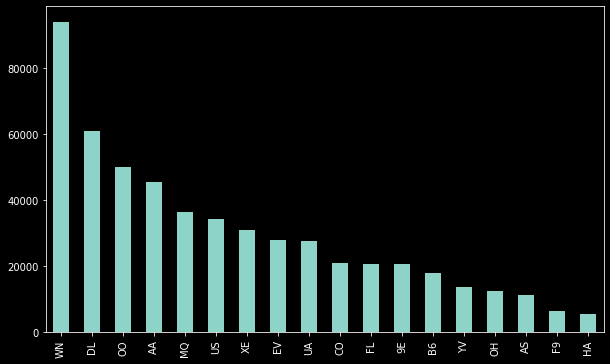

In [3]:
print(df.Airline.nunique())
df.Airline.value_counts().plot(figsize=(10,6), kind='bar')

In [4]:
df_summary = df[['Airline', 'AirportFrom', 'AirportTo', 'Flight', 'DayOfWeek', 'Time', 'Length', 'Delay']].groupby(by=['Airline','AirportFrom','AirportTo']).sum().sort_values(by='Delay', ascending=False)
df_summary

Flight  DayOfWeek    Time  Length  Delay
Airline AirportFrom AirportTo                                           
WN      DAL         HOU         137815       2669  557895   43285    477
        HOU         DAL         134371       2648  569625   40010    451
        OAK         LAX         620747       1569  309760   30015    315
        LAS         PHX         584001       1543  338720   27435    300
AA      ORD         DFW        1050117       1778  366820   68720    285
...                                ...        ...     ...     ...    ...
YV      IAD         PWM          14566         14    1474     184      0
EV      DTW         XNA           4957          6     940     140      0
YV      IAD         SAV           7284          5    1012     106      0
        IAH         IAD           7245          6     723     178      0
OH      MEM         GRR           6271          5    1135     109      0

[6836 rows x 5 columns]

In [5]:
query = """
select DayOfWeek
     , Delay
     , count(*) cnt
from
(
    select Airline
        , Flight
        , AirportFrom
        , AirportTo
        , DayOfWeek
        , Time
        , Length
        , Delay
    from df
)
group by 1,2
order by 3 desc
;
"""

sqldf(query)

,DayOfWeek,Delay,cnt
0,4,0,50201
1,5,0,49733
2,3,0,47492
3,3,1,42254
4,4,1,41244
5,2,0,39427
6,1,0,38739
7,7,0,38186
8,5,1,35515
9,6,0,35341


In [6]:
# binary classification

df.Delay.value_counts()

0    299119
1    240264
Name: Delay, dtype: int64

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64


<AxesSubplot:>

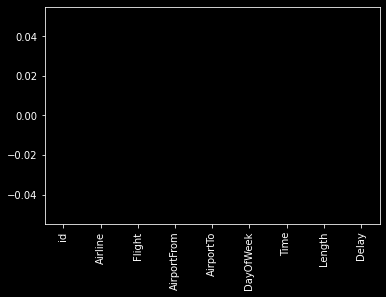

In [30]:
print(df.isnull().sum())
df.isnull().sum().plot(kind='bar')

### Logistic Regression

In [29]:
print(df.head(10))

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.metrics import r2_score, roc_auc_score
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

   id Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0   1      CO     269         SFO       IAH          3    15     205      1
1   2      US    1558         PHX       CLT          3    15     222      1
2   3      AA    2400         LAX       DFW          3    20     165      1
3   4      AA    2466         SFO       DFW          3    20     195      1
4   5      AS     108         ANC       SEA          3    30     202      0
5   6      CO    1094         LAX       IAH          3    30     181      1
6   7      DL    1768         LAX       MSP          3    30     220      0
7   8      DL    2722         PHX       DTW          3    30     228      0
8   9      DL    2606         SFO       MSP          3    35     216      1
9  10      AA    2538         LAS       ORD          3    40     200      1


In [18]:
# check dimension table

df_category_encoder = pd.DataFrame(encoder.fit_transform(df[['Airline', 'AirportFrom', 'AirportTo']]), columns=['Airline', 'AirportFrom', 'AirportTo'])

df_dimension = pd.concat([df, df_category_encoder], axis=1)
df_dimension

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,Airline,AirportFrom,AirportTo
0,1,CO,269,SFO,IAH,3,15,205,1,4.0,253.0,135.0
1,2,US,1558,PHX,CLT,3,15,222,1,14.0,217.0,60.0
2,3,AA,2400,LAX,DFW,3,20,165,1,1.0,154.0,80.0
3,4,AA,2466,SFO,DFW,3,20,195,1,1.0,253.0,80.0
4,5,AS,108,ANC,SEA,3,30,202,0,2.0,14.0,252.0
...,...,...,...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0,4.0,203.0,264.0
539379,539380,FL,398,SEA,ATL,5,1439,305,0,8.0,252.0,16.0
539380,539381,FL,609,SFO,MKE,5,1439,255,0,8.0,253.0,184.0
539381,539382,UA,78,HNL,SFO,5,1439,313,1,13.0,128.0,253.0


In [27]:
df_f = pd.concat([df_category_encoder, df[['Flight', 'DayOfWeek', 'Time', 'Length', 'Delay']]], axis=1)
df_f

,Airline,AirportFrom,AirportTo,Flight,DayOfWeek,Time,Length,Delay
0,4.0,253.0,135.0,269,3,15,205,1
1,14.0,217.0,60.0,1558,3,15,222,1
2,1.0,154.0,80.0,2400,3,20,165,1
3,1.0,253.0,80.0,2466,3,20,195,1
4,2.0,14.0,252.0,108,3,30,202,0
...,...,...,...,...,...,...,...,...
539378,4.0,203.0,264.0,178,5,1439,326,0
539379,8.0,252.0,16.0,398,5,1439,305,0
539380,8.0,253.0,184.0,609,5,1439,255,0
539381,13.0,128.0,253.0,78,5,1439,313,1


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_f.iloc[:,:-1], df_f.iloc[:,-1:], test_size=0.3, random_state=9095)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(377568, 7) (161815, 7) (377568, 1) (161815, 1)


In [37]:
lr.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [38]:
lr.predict_proba(x_train)

array([[0.45829107, 0.54170893],
       [0.51999062, 0.48000938],
       [0.38293159, 0.61706841],
       ...,
       [0.62115402, 0.37884598],
       [0.47742325, 0.52257675],
       [0.53275697, 0.46724303]])

In [47]:
print(f'linear logistic regression score: {round(lr.score(x_train, y_train)*100,2)}%')

linear logistic regression score: 56.89%


### XGBoost Classification

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
xgbc = XGBClassifier()

xgb_params_grid = {
    'n_estimators': [n for n in range(100, 500, 100)],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2,4,6]
}

xgb_grid = GridSearchCV(xgbc, param_grid=xgb_params_grid, scoring='roc_auc', n_jobs=-1)
xgb_grid.fit(x_train, y_train)

In [ ]:
print(f'최고 파라미터: {xgb_params_grid.best_score_}')
xgb_params_grid.best_params_

In [75]:
xgb = XGBClassifier(n_estimators = 700, learning_rate = 0.5, max_depth=6)
evals = [(x_test, y_test)]
xgb.fit(x_train, y_train, early_stopping_rounds = 200, eval_metric = 'auc', eval_set=evals)

[0]	validation_0-auc:0.67802
[1]	validation_0-auc:0.68213
[2]	validation_0-auc:0.68561
[3]	validation_0-auc:0.68783
[4]	validation_0-auc:0.68974
[5]	validation_0-auc:0.69168
[6]	validation_0-auc:0.69456
[7]	validation_0-auc:0.69673
[8]	validation_0-auc:0.69781
[9]	validation_0-auc:0.69923
[10]	validation_0-auc:0.69993
[11]	validation_0-auc:0.70039
[12]	validation_0-auc:0.70062
[13]	validation_0-auc:0.70118
[14]	validation_0-auc:0.70194
[15]	validation_0-auc:0.70274
[16]	validation_0-auc:0.70348
[17]	validation_0-auc:0.70380
[18]	validation_0-auc:0.70409
[19]	validation_0-auc:0.70475
[20]	validation_0-auc:0.70544
[21]	validation_0-auc:0.70549
[22]	validation_0-auc:0.70580
[23]	validation_0-auc:0.70604
[24]	validation_0-auc:0.70653
[25]	validation_0-auc:0.70652
[26]	validation_0-auc:0.70691
[27]	validation_0-auc:0.70727
[28]	validation_0-auc:0.70750
[29]	validation_0-auc:0.70764
[30]	validation_0-auc:0.70807
[31]	validation_0-auc:0.70818
[32]	validation_0-auc:0.70822
[33]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=700, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

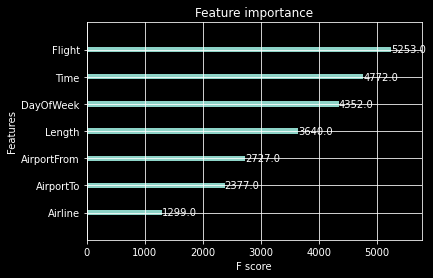

In [78]:
fig, ax = plt.subplots()

plot_importance(xgb, ax=ax)

In [83]:
xgb_pred = xgb.predict(x_test)
roc_score = roc_auc_score(y_test, xgb_pred)

print(f'roc_score: {round(roc_score*100,2)}%')

roc_score: 65.37%
